In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics #neighbors, preprocessing, 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]


In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

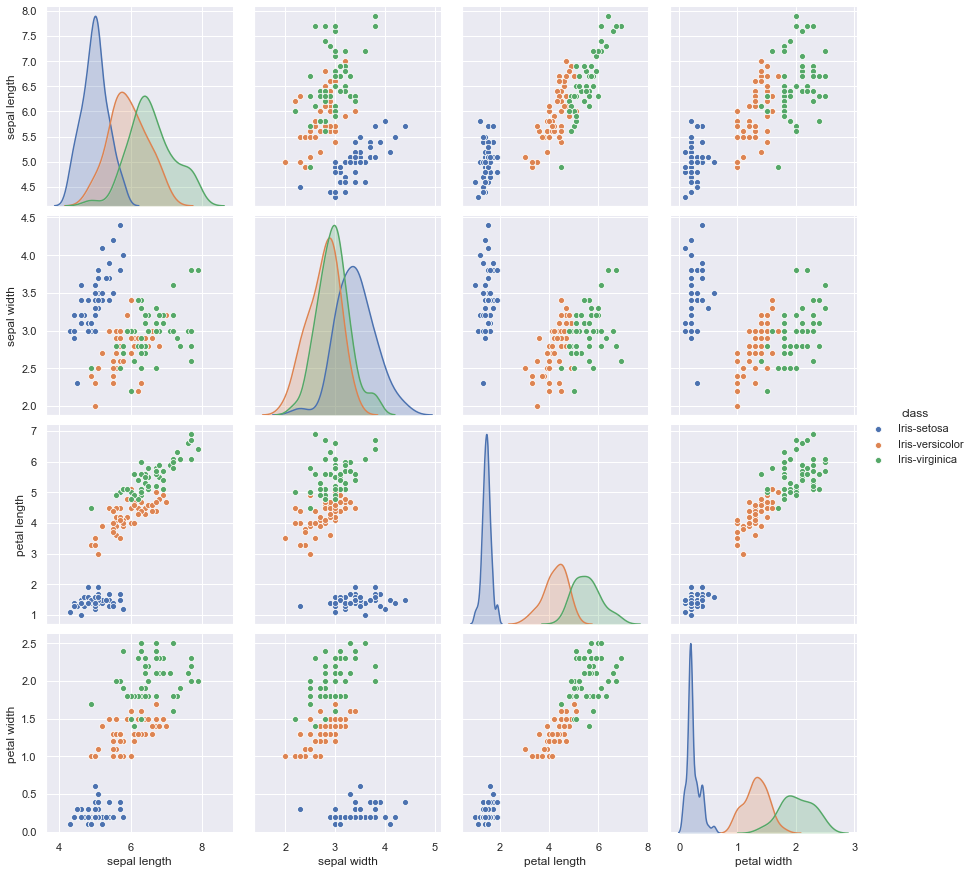

In [5]:
sns.set()
sns.pairplot(df, hue='class',height=3)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,:-1], 
                                                    df.iloc[:,-1], test_size=0.25)

In [7]:
df.iloc[:,-1].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
y_train[y_train.iloc[0:] == 'Iris-versicolor'] = 'r'
y_train[y_train.iloc[0:] == 'Iris-virginica'] = 'g'
y_train[y_train.iloc[0:] == 'Iris-setosa'] = 'b'

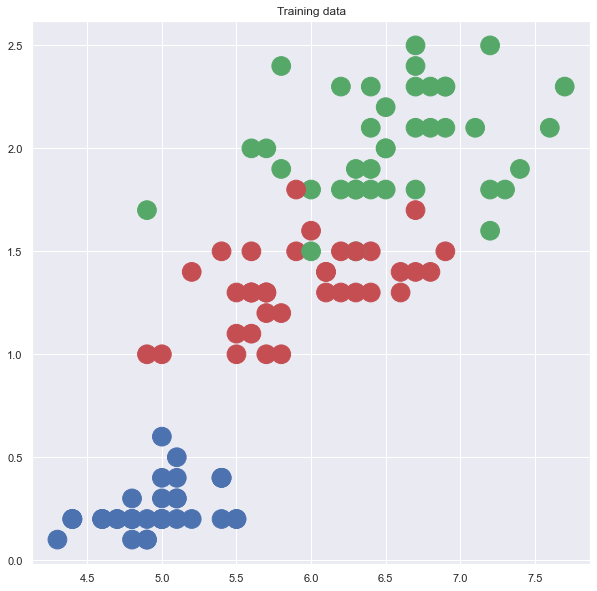

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(X_train.iloc[:,0:1], X_train.iloc[:,3:4], c=y_train[:], s=350, cmap='viridis')
plt.title('Training data')
plt.show()

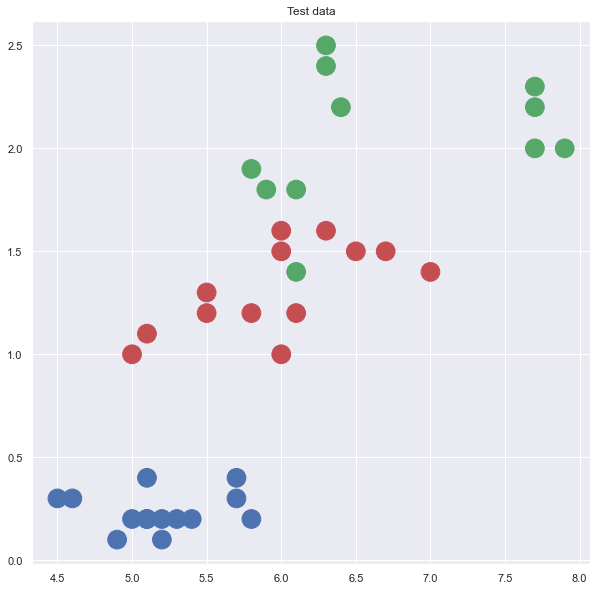

In [10]:
y_test[y_test.iloc[0:] == 'Iris-versicolor'] = 'r'
y_test[y_test.iloc[0:] == 'Iris-virginica'] = 'g'
y_test[y_test.iloc[0:] == 'Iris-setosa'] = 'b'

plt.figure(figsize=(10,10))
plt.scatter(X_test.iloc[:,0:1], X_test.iloc[:,3:4], c=y_test[:], s=350, cmap='viridis')
plt.title('Test data')
plt.show()

In [11]:
y_train[y_train.iloc[0:] == 'r'] = 'Iris-versicolor'
y_train[y_train.iloc[0:] == 'g'] = 'Iris-virginica'
y_train[y_train.iloc[0:] == 'b'] = 'Iris-setosa'

y_test[y_test.iloc[0:] == 'r'] = 'Iris-versicolor'
y_test[y_test.iloc[0:] == 'g'] = 'Iris-virginica'
y_test[y_test.iloc[0:] == 'b'] = 'Iris-setosa'

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB

In [13]:
rf =RandomForestClassifier(n_estimators=100, random_state=101)

In [14]:
knn = neighbors.KNeighborsClassifier()

In [15]:
nb = GaussianNB()

In [16]:
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [17]:
def evaluate_CM(actual, pred):
    [[TPa, Eba, Eca],
    [Eab, TPb, Ecb],
    [Eac, Ebc, TPc]]= np.zeros((3,3))
    
    for i in range(len(actual)):
        if actual[i] == pred[i] and actual[i] == 0:
            TPa += 1
        if actual[i] == 1 and pred[i] == 0:
            Eba += 1
        if actual[i] == 2 and pred[i] == 0:
            Eca += 1
        if actual[i] == pred[i] and actual[i] == 1:
            TPb += 1
        if actual[i] == 0 and pred[i] == 1:
            Eab += 1
        if actual[i] == 2 and pred[i] == 1:
            Ecb += 1
            
        if actual[i] == pred[i] and actual[i] == 2:
            TPc += 1
        if actual[i] == 0 and pred[i] == 2:
            Eac += 1
        if actual[i] == 1 and pred[i] == 2:
            Ebc += 1 
    return np.array([[TPa, Eba, Eca],
                [Eab, TPb, Ecb],
                [Eac, Ebc, TPc]])  
      

In [18]:
X = df.iloc[:,:-1]
Y = LabelEncoder().fit_transform(df.iloc[:,-1])
rf_cm = []
knn_cm = []
nb_cm = []

In [19]:
def getCM(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return evaluate_CM(y_test, y_pred)
    

In [20]:
for train_index, test_index in kf.split(X, Y):
    rf_cm.append(getCM(rf, X.iloc[train_index], X.iloc[test_index], Y[train_index], Y[test_index]))
    knn_cm.append(getCM(knn, X.iloc[train_index], X.iloc[test_index], Y[train_index], Y[test_index]))
    nb_cm.append(getCM(nb, X.iloc[train_index], X.iloc[test_index], Y[train_index], Y[test_index]))

In [21]:
knn_cm = np.divide(np.sum(knn_cm, axis=0), len(knn_cm))
rf_cm = np.divide(np.sum(rf_cm, axis=0), len(rf_cm))
nb_cm = np.divide(np.sum(nb_cm, axis=0), len(nb_cm))

In [22]:
rf_cm

array([[5. , 0. , 0. ],
       [0. , 4.7, 0.7],
       [0. , 0.3, 4.3]])

In [23]:
knn_cm

array([[5. , 0. , 0. ],
       [0. , 4.5, 0.5],
       [0. , 0.5, 4.5]])

In [24]:
nb_cm

array([[5. , 0. , 0. ],
       [0. , 4.6, 0.4],
       [0. , 0.4, 4.6]])

In [25]:
def getAccuracy(cm):
    [[TPa, Eba, Eca],
    [Eab, TPb, Ecb],
    [Eac, Ebc, TPc]]=cm
    return (TPa+TPb+TPc)/sum(cm.flatten())

In [26]:
def getPrecision(cm, index):
    return getTP(cm, index)/(getTP(cm, index) + getFP(cm, index))    

In [27]:
def getTN(cm, index):
    tn = 0
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            if j != index and i != index:
                tn += cm[i][j]
    return tn

In [28]:
def getTP(cm, index):
    return cm[index][index]

In [29]:
def getFP(cm, index):
    fp = 0
    for i in range(len(cm)):
        if i != index:
            fp += cm[i][index]
    return fp

In [30]:
def getFN(cm, index):
    fn = 0
    for i in range(len(cm)):
        if i != index:
            fn += cm[index][i]
    return fn

In [31]:
def getTPR(cm, index): #sensitivity/RECALL
    return getTP(cm, index)/(getTP(cm, index) + getFN(cm, index))

In [32]:
def getTNR(cm, index): #Specificity
    return getTN(cm, index)/(getTN(cm, index) + getFP(cm, index))

In [33]:
def getF1Score(cm, i):
    return 2*(getPrecision(cm, i) * getTPR(cm, i))/(getPrecision(cm, i) + getTPR(cm, i))

In [34]:
classifiers = [rf_cm, knn_cm, nb_cm]
labels = ["Random Forest", "KNN", "Naive Bayes"]

In [35]:
classes = LabelEncoder().fit(df.iloc[:,-1]).classes_

In [36]:
df2 = []
Acc = []
for i in range(len(classifiers)):
    TP = []
    FP = []
    TN = []
    FN = []
    TP_FN = []
    FP_TN = []
    Prec = []
    Spec = []
    Score = []
    Sens = []
    for j in range(len(classes)):
        TP.append(getTP(classifiers[i], j))
        FP.append(getFP(classifiers[i], j))
        TN.append(getTN(classifiers[i], j))
        FN.append(getFN(classifiers[i], j))
        TP_FN.append(TP[j] + FN[j])
        FP_TN.append(FP[j] + TN[j])
        Prec.append(getPrecision(classifiers[i], j))
        Spec.append(getTNR(classifiers[i], j))
        Score.append(getF1Score(classifiers[i], j))
        Sens.append(getTPR(classifiers[i], j))
    Acc.append(getAccuracy(classifiers[i])) 
    df2.append(pd.DataFrame({"TP":TP, "FP":FP, "TN":TN, "FN":FN, "TP+FN":TP_FN, "FP+TN":FP_TN, "Pecision":Prec, 
                  "Specificity":Spec, "Score":Score, "Sensitivity":Sens}, index=classes))

In [39]:
for i in range(len(df2)):
    print(labels[i], "Accuracy: ", Acc[i])
    print(df2[i])
    print('\n')


Random Forest Accuracy:  0.9333333333333333
                  TP   FP    TN   FN  TP+FN  FP+TN  Pecision  Specificity  \
Iris-setosa      5.0  0.0  10.0  0.0    5.0   10.0      1.00     1.000000   
Iris-versicolor  4.7  0.3   9.3  0.7    5.4    9.6      0.94     0.968750   
Iris-virginica   4.3  0.7   9.7  0.3    4.6   10.4      0.86     0.932692   

                    Score  Sensitivity  
Iris-setosa      1.000000     1.000000  
Iris-versicolor  0.903846     0.870370  
Iris-virginica   0.895833     0.934783  


KNN Accuracy:  0.9333333333333333
                  TP   FP    TN   FN  TP+FN  FP+TN  Pecision  Specificity  \
Iris-setosa      5.0  0.0  10.0  0.0    5.0   10.0       1.0         1.00   
Iris-versicolor  4.5  0.5   9.5  0.5    5.0   10.0       0.9         0.95   
Iris-virginica   4.5  0.5   9.5  0.5    5.0   10.0       0.9         0.95   

                 Score  Sensitivity  
Iris-setosa        1.0          1.0  
Iris-versicolor    0.9          0.9  
Iris-virginica     0.9  

In [38]:
Acc

[0.9333333333333333, 0.9333333333333333, 0.9466666666666667]